In [160]:
import pandas as pd
import datetime as dt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

pmi = pd.read_excel('OG PMI.xlsx', header=0, parse_dates=[0])
pmi = pmi.loc[(pmi['Date']>'2016-11-01') & (pmi['Date']<'2021-05-01')]
pmi = pmi.set_index('Date')

pmi

,PMI
Date,
2016-12-01,54.5
2017-01-01,56.0
2017-02-01,57.7
2017-03-01,57.2
2017-04-01,54.8
2017-05-01,54.9
2017-06-01,57.8
2017-07-01,56.3
2017-08-01,58.8


In [161]:
bookings = pd.read_csv('Bookings.csv', parse_dates=[0])
bookings['Month'] = pd.to_datetime(bookings['Booking Date (BBS)'].dt.strftime('%m/%Y'))
bookings.head()

,Booking Date (BBS),Account Name,Product Name,Booking Qty (BBS),Opportunity Owner,Calculated Total Sale,Calculated GP$,Month
0,2016-11-09,American Manufacturing,PUMA 700L,1.0,Todd Eccless,362900.0,125942.0,2016-11-01
1,2016-12-16,Aura Fabricators Inc,MYNX 7500/50 / 6K / 40 ATC,1.0,Todd Eccless,239900.0,239900.0,2016-12-01
2,2016-01-29,Galaxy Precision Inc.,LYNX 220LSYC,1.0,Todd Eccless,138560.0,138560.0,2016-01-01
3,2016-08-29,"Host Machine, Inc.",PUMA GT2100,1.0,Todd Eccless,83550.0,83550.0,2016-08-01
4,2016-12-14,"Host Machine, Inc.",PUMA GT2100,1.0,Todd Eccless,69900.0,10256.0,2016-12-01


In [162]:
monthly_bookings = bookings.groupby('Month').sum().sort_values(by='Month').loc['2016-12-01':'2021-04-01']
monthly_bookings

,Booking Qty (BBS),Calculated Total Sale,Calculated GP$
Month,,,
2016-12-01,97.0,14757646.23,7087385.76
2017-01-01,40.0,6408134.20,2747577.12
2017-02-01,73.0,11846751.71,3747760.09
2017-03-01,88.0,12939830.97,4174495.15
2017-04-01,63.0,9555428.97,1952637.10
2017-05-01,75.0,12457574.76,2931783.82
2017-06-01,63.0,10612381.87,2468006.11
2017-07-01,66.0,10384388.90,3042091.96
2017-08-01,84.0,12622074.46,2369857.94


In [163]:
monthly_bookings['Total PMI'] = [row for row in pmi['PMI']]
monthly_bookings['Bookings Change'] = [monthly_bookings['Booking Qty (BBS)'][n]-monthly_bookings['Booking Qty (BBS)'][n-1] 
                                       if n>0 else 0 for n in range(len(monthly_bookings))]
monthly_bookings['Total PMI Change'] = [monthly_bookings['Total PMI'][n]-monthly_bookings['Total PMI'][n-1] if n>0 
                                           else 0 for n in range(len(monthly_bookings))]
monthly_bookings['Bookings Trend'] = monthly_bookings['Bookings Change']/[abs(value)
                                                                            for value in 
                                                                            (monthly_bookings['Bookings Change'])]
monthly_bookings['Calculated Total Sale Change'] = [monthly_bookings['Calculated Total Sale'][n]-monthly_bookings['Calculated Total Sale'][n-1] if n>0 else 0 for n in range(len(monthly_bookings))]
monthly_bookings['Calculated Total Sale Trend'] = monthly_bookings['Calculated Total Sale Change']/[abs(value)
                                                                                      for value in
                                                                                      (monthly_bookings['Calculated Total Sale Change'])]
monthly_bookings['Total PMI Trend'] = [-1 if pmi<50 else 1 for pmi in monthly_bookings['Total PMI']]
monthly_bookings = monthly_bookings.fillna(0)
monthly_bookings.head(10)

,Booking Qty (BBS),Calculated Total Sale,Calculated GP$,Total PMI,Bookings Change,Total PMI Change,Bookings Trend,Calculated Total Sale Change,Calculated Total Sale Trend,Total PMI Trend
Month,,,,,,,,,,
2016-12-01,97.0,14757646.23,7087385.76,54.5,0.0,0.0,0.0,0.00,0.0,1
2017-01-01,40.0,6408134.20,2747577.12,56.0,-57.0,1.5,-1.0,-8349512.03,-1.0,1
2017-02-01,73.0,11846751.71,3747760.09,57.7,33.0,1.7,1.0,5438617.51,1.0,1
2017-03-01,88.0,12939830.97,4174495.15,57.2,15.0,-0.5,1.0,1093079.26,1.0,1
2017-04-01,63.0,9555428.97,1952637.10,54.8,-25.0,-2.4,-1.0,-3384402.00,-1.0,1
2017-05-01,75.0,12457574.76,2931783.82,54.9,12.0,0.1,1.0,2902145.79,1.0,1
2017-06-01,63.0,10612381.87,2468006.11,57.8,-12.0,2.9,-1.0,-1845192.89,-1.0,1
2017-07-01,66.0,10384388.90,3042091.96,56.3,3.0,-1.5,1.0,-227992.97,-1.0,1
2017-08-01,84.0,12622074.46,2369857.94,58.8,18.0,2.5,1.0,2237685.56,1.0,1


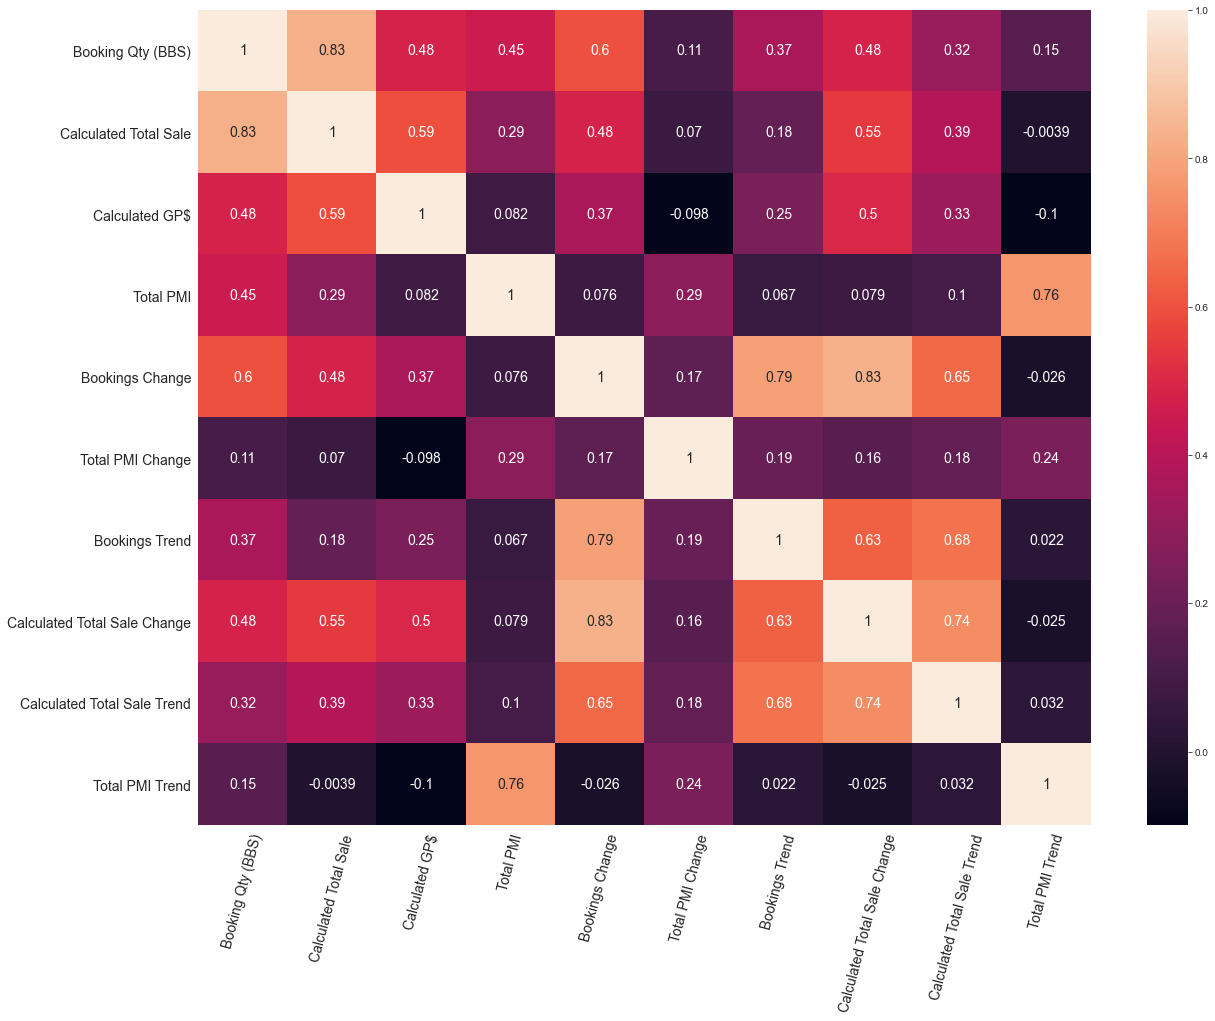

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
sns.set_style("whitegrid")

fig,ax = plt.subplots(figsize=(20,15))
sns.heatmap(monthly_bookings.corr(), annot=True, annot_kws={"fontsize":14})
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14, labelrotation=75)

In [96]:
count=0
for n in range(len(monthly_bookings)):
    if monthly_bookings['Bookings Trend'][n]==monthly_bookings['Calculated Total Sale Trend'][n]:
        count=count+1
print('Number of times Bookings and Total Sales change in the same direction: ' + str(count) + ' out of 53 times')

Number of times Bookings and Total Sales change in the same direction: 43 out of 53 times


Number of times Bookings and PMI change in the same direction: 29


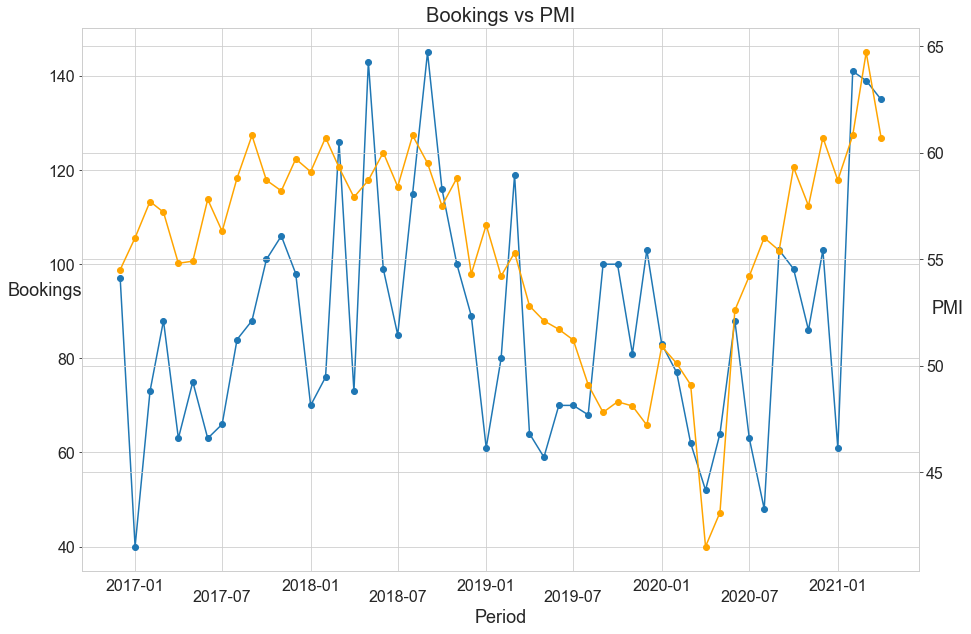

In [97]:
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(monthly_bookings.index, monthly_bookings['Booking Qty (BBS)'], marker='o')
ax2 = ax.twinx()
ax2.plot(monthly_bookings.index, monthly_bookings['Total PMI'], color='orange', marker='o')
plt.title('Bookings vs PMI', fontsize=20)
ax.set_ylabel('Bookings', fontsize=18).set_rotation(0)
ax2.set_ylabel('PMI', fontsize=18).set_rotation(0)
ax.set_xlabel('Period', fontsize=18)
plt.xlabel('Month', fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
    
count=0
for n in range(len(monthly_bookings)):
    if monthly_bookings['Bookings Trend'][n]==monthly_bookings['Total PMI Trend'][n]:
        count=count+1
print('Number of times Bookings and PMI change in the same direction: ' + str(count))

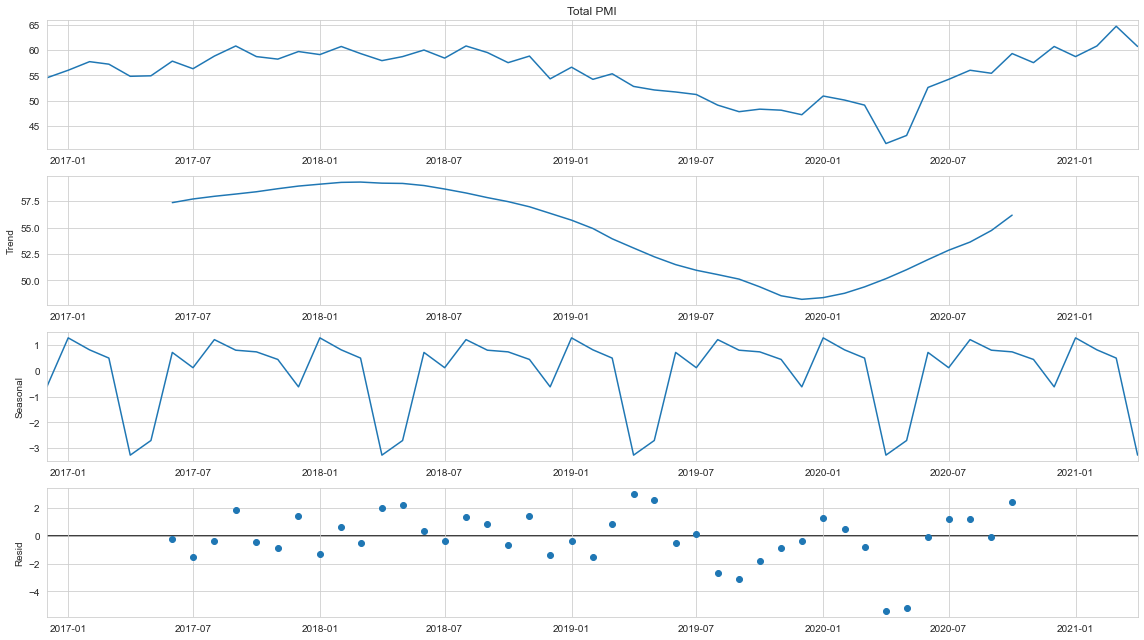

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(monthly_bookings['Total PMI'], period=12).plot()

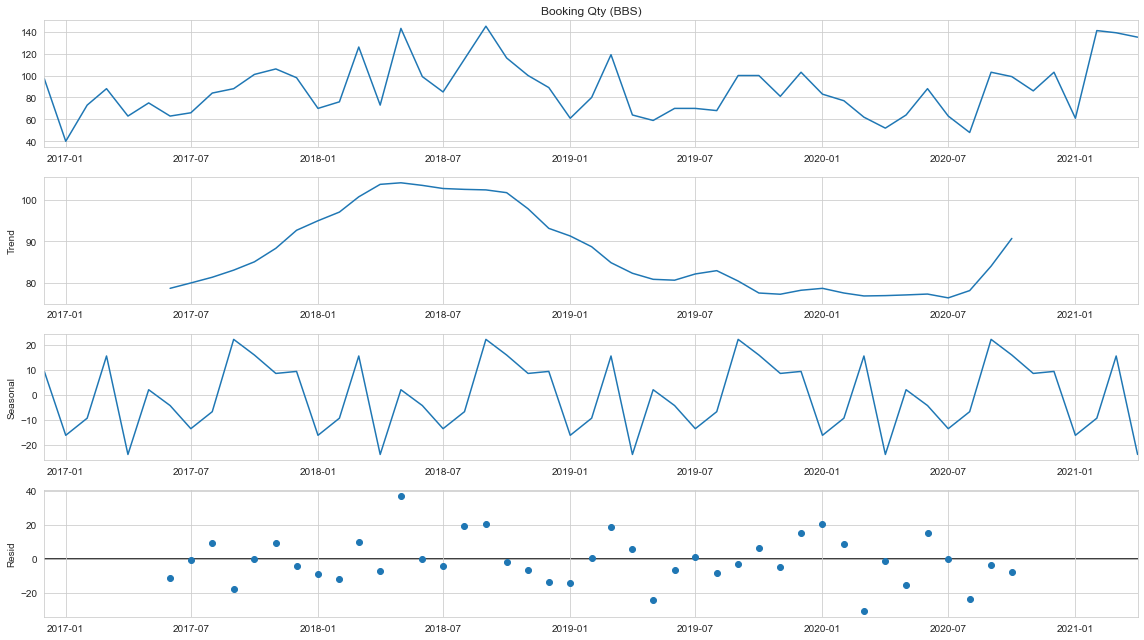

In [99]:
plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(monthly_bookings['Booking Qty (BBS)'], period=12).plot()

In [178]:
import pmdarima as pm

pmi = pd.read_excel('OG PMI.xlsx', header=0, parse_dates=[0])
pmi = pmi.set_index('Date').loc[:'2021-04-01']

results = pm.auto_arima(pmi['PMI'], seasonal=True, m=12, error_action='ignore', suppress_warnings=True)
results

ARIMA(order=(2, 0, 1), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Mean absolute error: 1.8896778122233568
Number of times observed PMI lay outside 95% confidence intervals: 26 out of 880 times


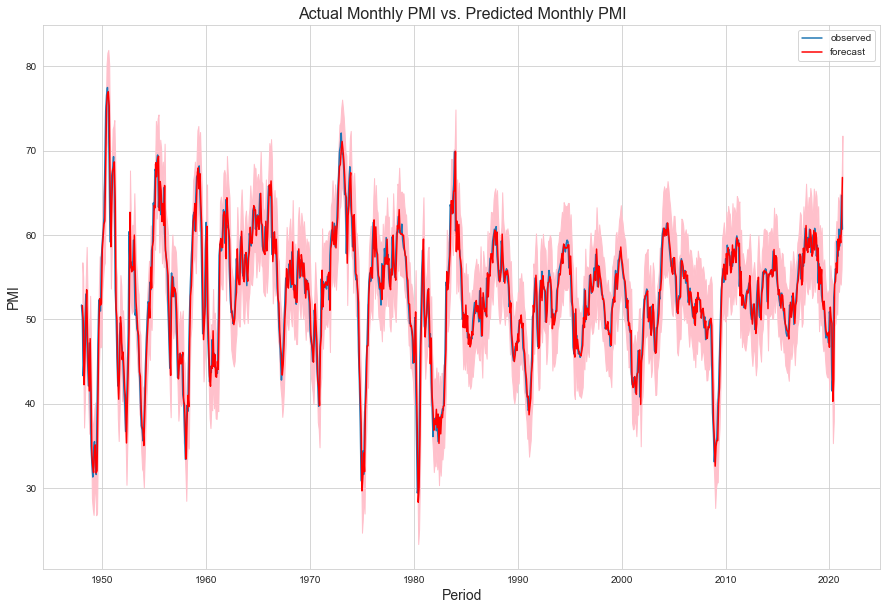

In [179]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

results = SARIMAX(pmi['PMI'], order=(2,0,1), seasonal_order=(2, 0, 0, 12)).fit()

fig, ax = plt.subplots(figsize=(15,10))
one_step_forecast = results.get_prediction(start=-len(pmi))
mean_forecast = one_step_forecast.predicted_mean
plt.plot(pmi.index, pmi, label='observed')
plt.plot(mean_forecast.index[1:], mean_forecast['1948-02-01':], color='r', label='forecast')
confidence_intervals = one_step_forecast.conf_int()
lower_limits = confidence_intervals.loc['1948-02-01':,'lower PMI']
upper_limits = confidence_intervals.loc['1948-02-01':,'upper PMI']
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.legend()
plt.title('Actual Monthly PMI vs. Predicted Monthly PMI', fontsize=16)
plt.xlabel('Period', fontsize=14)
plt.ylabel('PMI', fontsize=14)
print('Mean absolute error: ' + str(np.mean(abs(results.resid[1:]))))

outside = 0
for n in range(len(pmi)):
    if (pmi['PMI'][n] > confidence_intervals['upper PMI'][n]) or (mean_forecast[n] < confidence_intervals['lower PMI'][n]):
        outside += 1
    else:
        outside = outside
print('Number of times observed PMI lay outside 95% confidence intervals: ' + str(outside) + ' out of ' + str(len(pmi)) + ' times')

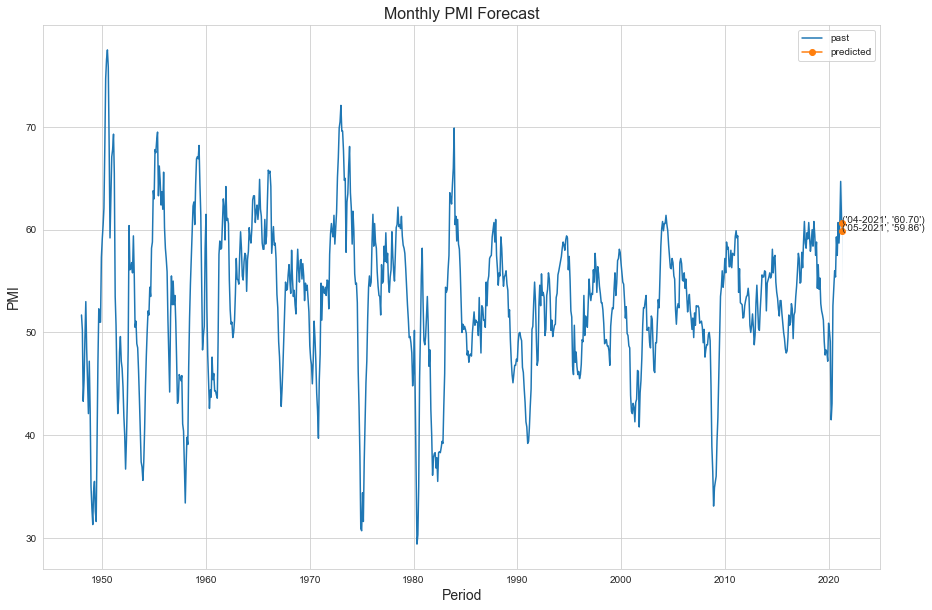

In [180]:
from datetime import datetime as dt
import time

fig, ax = plt.subplots(figsize=(15,10))

forecast_object = results.get_forecast(steps=1)
mean = pd.concat([pmi['PMI'].tail(1), forecast_object.predicted_mean])
last_conf_int = pd.DataFrame(index=[dt.fromtimestamp(int(time.mktime(pmi.index[-1].timetuple()))).strftime('%Y-%m-%d')], 
             data={'lower PMI':pmi['PMI'][-1],
                  'upper PMI':pmi['PMI'][-1]})
conf_int = pd.concat([last_conf_int, forecast_object.conf_int()])
dates = mean.index

plt.plot(pmi.index, pmi['PMI'], label='past')
plt.plot(dates, mean, label='predicted', marker='o')
plt.fill_between(dates, conf_int['lower PMI'], conf_int['upper PMI'], alpha=0.2)

plt.title('Monthly PMI Forecast', fontsize=16)
plt.xlabel('Period', fontsize=14)
plt.ylabel('PMI', fontsize=14)

for i,j in mean.items():
    ax.annotate((i.strftime('%m-%Y'),"{:.2f}".format(j)), xy=(i, j))

plt.legend()
plt.show()

In [153]:
all_monthly = bookings.groupby('Month').sum().sort_values(by='Month').loc[:'2021-05-01']

results = pm.auto_arima(all_monthly['Booking Qty (BBS)'], seasonal=True, m=12, error_action='ignore', suppress_warnings=True)
results

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sgau\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Mean absolute error: 17.07572684224299
Number of times observed PMI lay outside 95% confidence intervals: 3 out of 69 times


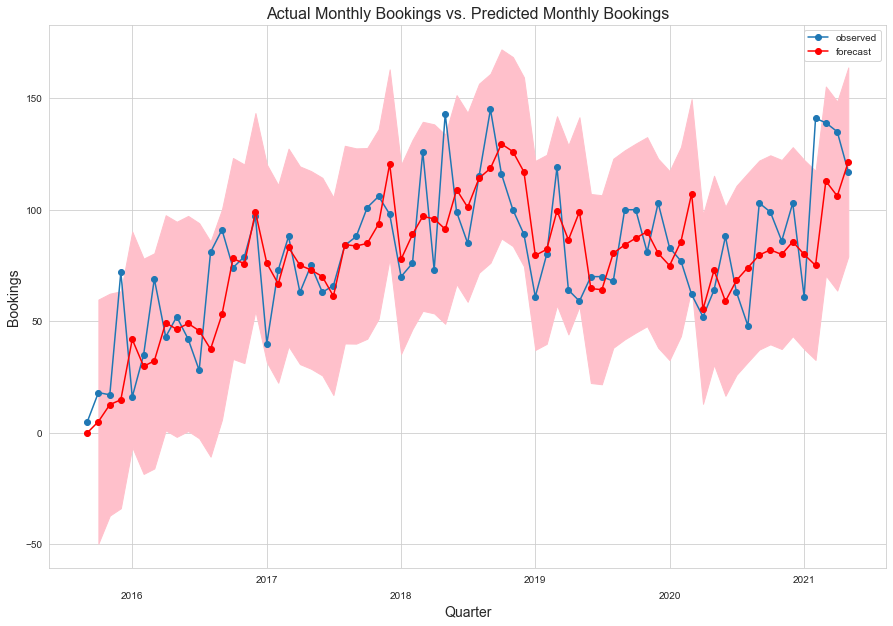

In [154]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

results = SARIMAX(all_monthly['Booking Qty (BBS)'], order=(0,1,1), seasonal_order=(2,0,0,12)).fit()

fig, ax = plt.subplots(figsize=(15,10))
one_step_forecast = results.get_prediction(start=-len(all_monthly))
mean_forecast = one_step_forecast.predicted_mean
plt.plot(all_monthly.index, all_monthly['Booking Qty (BBS)'], label='observed', marker='o')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast', marker='o')
confidence_intervals = one_step_forecast.conf_int()
lower_limits = confidence_intervals.loc['2015-10-01':,'lower Booking Qty (BBS)']
upper_limits = confidence_intervals.loc['2015-10-01':,'upper Booking Qty (BBS)']
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.legend()
plt.title('Actual Monthly Bookings vs. Predicted Monthly Bookings', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Bookings', fontsize=14)
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(20)

    
print('Mean absolute error: ' + str(np.mean(abs(results.resid))))

outside = 0
for n in range(len(all_monthly)):
    if (all_monthly['Booking Qty (BBS)'][n] > confidence_intervals['upper Booking Qty (BBS)'][n]) or (mean_forecast[n] < confidence_intervals['lower Booking Qty (BBS)'][n]):
        outside += 1
    else:
        outside = outside
print('Number of times observed PMI lay outside 95% confidence intervals: ' + str(outside) + ' out of ' + str(len(all_monthly)) + ' times')

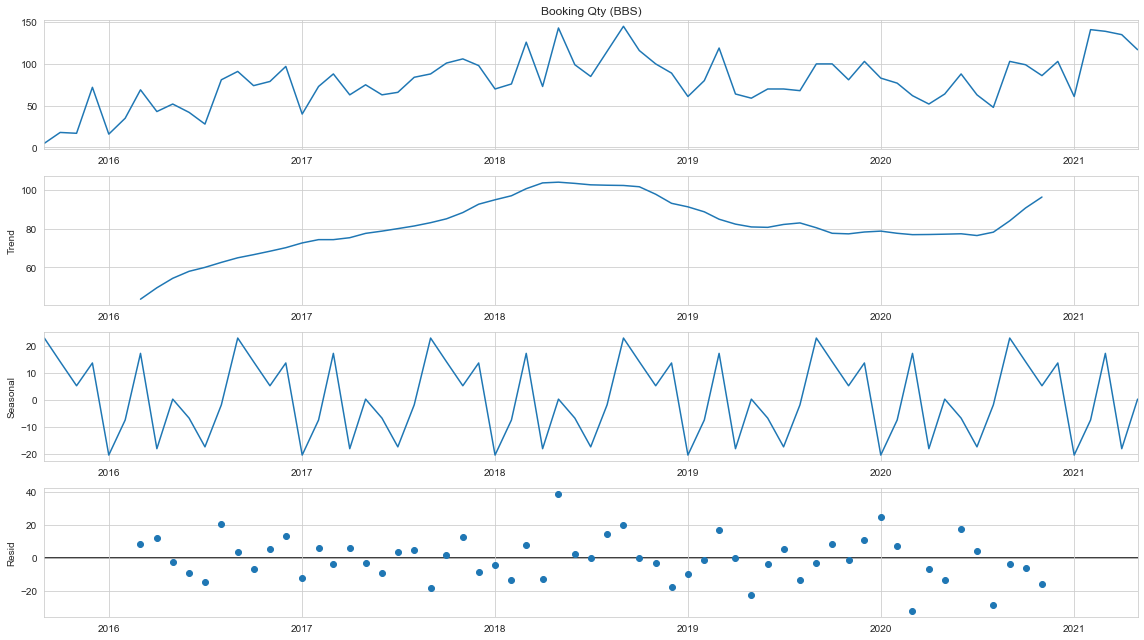

In [155]:
plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(all_monthly['Booking Qty (BBS)'], period=12).plot()

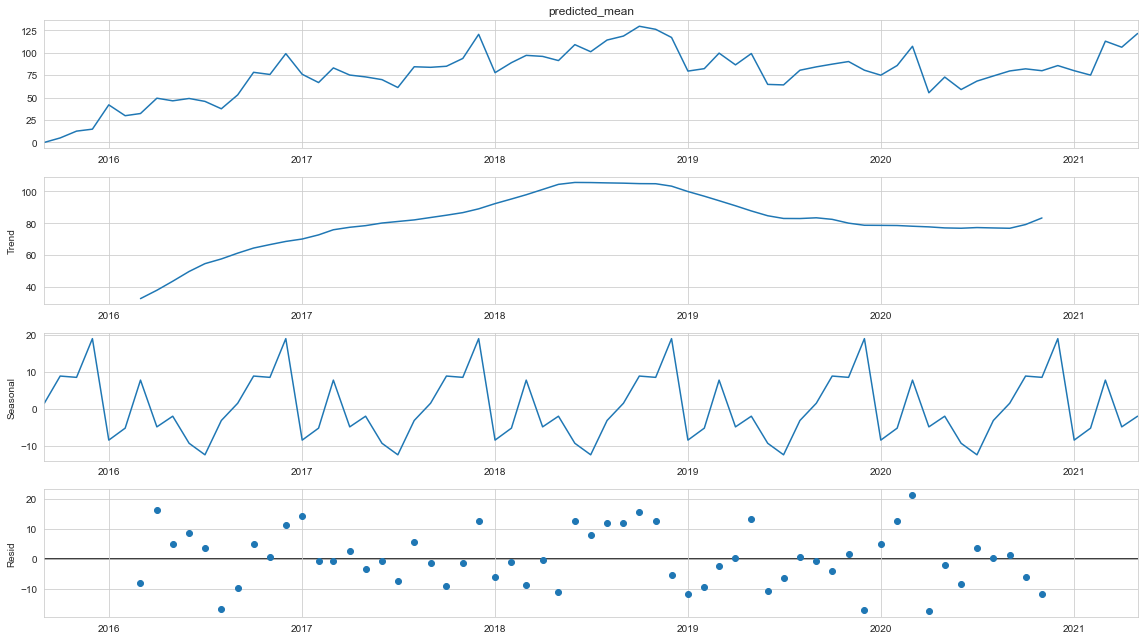

In [156]:
plt.rcParams["figure.figsize"] = [16,9]
fig = seasonal_decompose(mean_forecast, period=12).plot()

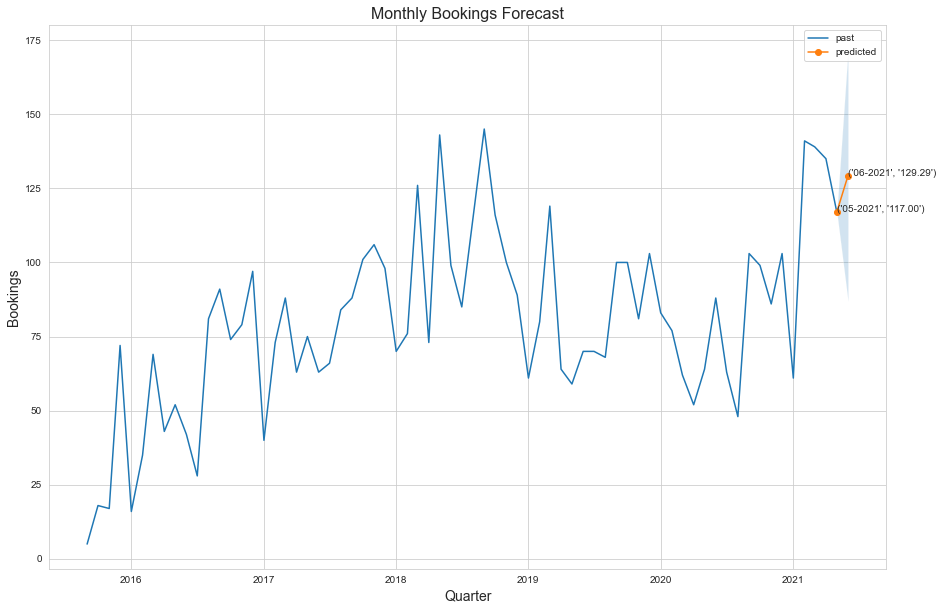

In [157]:
fig, ax = plt.subplots(figsize=(15,10))

forecast_object = results.get_forecast(steps=1)
mean = pd.concat([all_monthly['Booking Qty (BBS)'].tail(1), forecast_object.predicted_mean])
last_conf_int = pd.DataFrame(index=['2021-01-01'], 
             data={'lower Booking Qty (BBS)':all_monthly['Booking Qty (BBS)'][-1],
                  'upper Booking Qty (BBS)': all_monthly['Booking Qty (BBS)'][-1]})
conf_int = pd.concat([last_conf_int, forecast_object.conf_int()])
dates = mean.index

plt.plot(all_monthly.index, all_monthly['Booking Qty (BBS)'], label='past')
plt.plot(dates, mean, label='predicted', marker='o')
plt.fill_between(dates, conf_int['lower Booking Qty (BBS)'], conf_int['upper Booking Qty (BBS)'], alpha=0.2)

plt.title('Monthly Bookings Forecast', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Bookings', fontsize=14)

for i,j in mean.items():
    ax.annotate((i.strftime('%m-%Y'),"{:.2f}".format(j)), xy=(i, j))

plt.legend()
plt.show()